# Youth Mental Health Narratives Challenge

# 1. Setting Up the Environment


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("features_Z140Hep.csv")

# View structure and first few rows
print(df.info())
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 73 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   uid                               4000 non-null   object
 1   NarrativeLE                       4000 non-null   object
 2   NarrativeCME                      4000 non-null   object
 3   LE_CircumstancesOtherText         453 non-null    object
 4   CME_CircumstancesOtherText        594 non-null    object
 5   MentalHealthProblem               4000 non-null   int64 
 6   DepressedMood                     4000 non-null   int64 
 7   MentalIllnessTreatmentCurrnt      4000 non-null   int64 
 8   HistoryMentalIllnessTreatmnt      4000 non-null   int64 
 9   SuicideAttemptHistory             4000 non-null   int64 
 10  SuicideThoughtHistory             4000 non-null   int64 
 11  AlcoholProblem                    4000 non-null   int64 
 12  SubstanceAbuseOther 

,uid,NarrativeLE,NarrativeCME,LE_CircumstancesOtherText,CME_CircumstancesOtherText,MentalHealthProblem,DepressedMood,MentalIllnessTreatmentCurrnt,HistoryMentalIllnessTreatmnt,SuicideAttemptHistory,...,HealthProblemPainUnkDuration,LE_HealthProblemTypeDescription,CME_HealthProblemTypeDescription,HouseholdSubstanceAbuse,AbusedAsChild,PriorCPSReport,VictimKnownToAuthorities,InterpersonalViolencePerp,InterpersonalViolenceVictim,TraumaticBrainInjuryHistory
0,aaaf,V (XX XX) shot himself in a motor vehicle.The ...,V (XX XX) shot himself in a motor vehicle.The ...,NaN,NaN,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
1,aaby,V was XXXX. V was found in the basement of his...,V was XXXX. V was found in the basement of hi...,NaN,NaN,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
2,aacl,V was XXXX. V was found in his residence unres...,V was XXXX. V was found in his residence suffe...,NaN,Marijuana,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
3,aacn,"The victim, a XX XX who had recently returned ...",On the day of the fatal event in the early mor...,NaN,NaN,0,1,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0
4,aadb,XX XX V found deceased at home by his grandpar...,XX XX V found deceased at home by his grandpar...,NaN,NaN,0,0,0,0,0,...,0,NaN,NaN,0,0,0,0,0,0,0


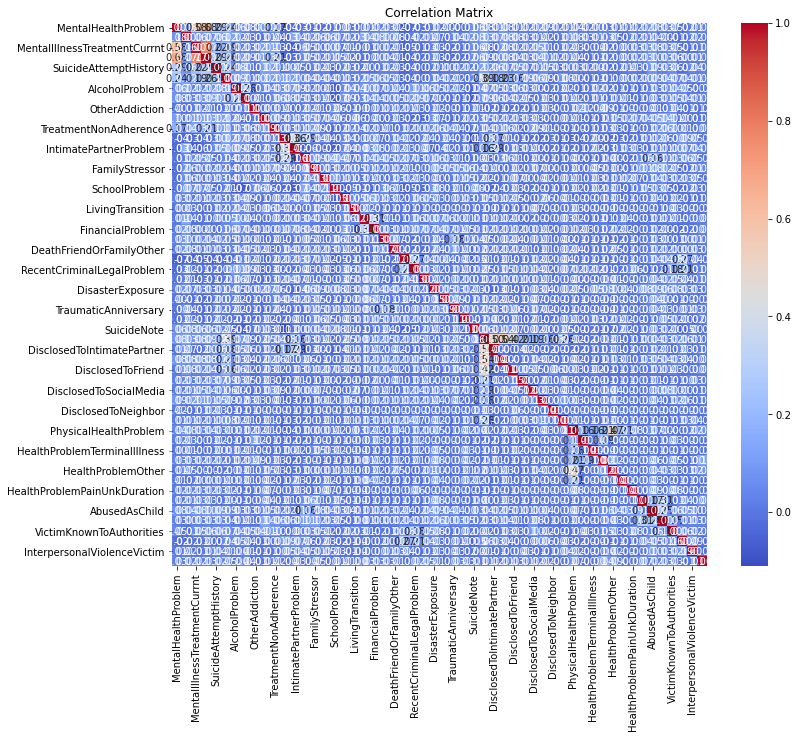

In [2]:
#Exploratory Data Analysis(EDA)


import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Remove highly correlated features
#This helps identify redundant features — we remove highly correlated ones to avoid multicollinearity.
# Adjust these features based on the correlation matrix
features_to_drop = ['AlcoholProblem', 'SuicideAttemptHistory']  # Example features to drop
df_reduced = df.drop(features_to_drop, axis=1)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import scipy.sparse

# Combine the 'NarrativeLE' and 'NarrativeCME' columns into one
df['combined_narrative'] = df['NarrativeLE'].fillna('') + ' ' + df['NarrativeCME'].fillna('')

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data into vectors
X_text = tfidf.fit_transform(df['combined_narrative'])

# Check shape of the resulting text vector
print("Shape of text data:", X_text.shape)

# Combine text vectors with other binary features (e.g., MentalHealthProblem, SuicideAttemptHistory, AlcoholProblem)
X_features = df[['MentalHealthProblem', 'SuicideAttemptHistory', 'AlcoholProblem']].fillna(0)

# Convert the X_features to sparse format and merge it with X_text
X_combined = scipy.sparse.hstack([X_text, scipy.sparse.csr_matrix(X_features)])

# Define the target variable (for example, predicting MentalHealthProblem)
y = df['MentalHealthProblem'].fillna(0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Shape of text data: (4000, 5000)
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       386

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [2]:
# Text Preprocessing & Feature Extraction

from sklearn.feature_extraction.text import TfidfVectorizer

# Combine narrative columns (adjust if column names are different)
df['combined_narrative'] = df['NarrativeLE'].fillna('') + ' ' + df['NarrativeCME'].fillna('')

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data into vectors
X_text = tfidf.fit_transform(df['combined_narrative'])

# Check the shape of the resulting text vector
print("Shape of text data:", X_text.shape)


Shape of text data: (4000, 5000)


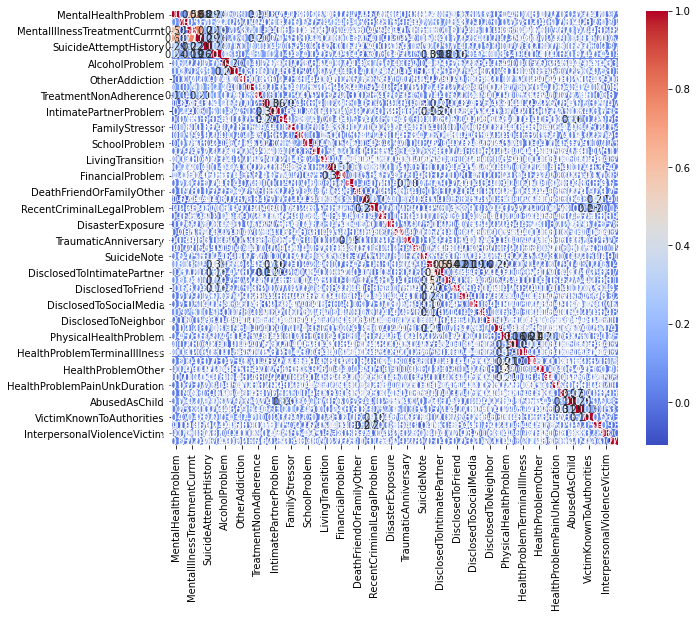

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Combine the 'NarrativeLE' and 'NarrativeCME' columns into one
df['combined_narrative'] = df['NarrativeLE'].fillna('') + ' ' + df['NarrativeCME'].fillna('')

# Step 2: TF-IDF vectorization on narrative text
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = tfidf.fit_transform(df['combined_narrative'])

# Step 3: Define the target variable
y = df['MentalHealthProblem']

# Step 4: Select structured features that are related but not the target
structured_cols = [
    'SuicideAttemptHistory', 'AlcoholProblem', 'DepressedMood',
    'HistoryMentalIllnessTreatmnt', 'SubstanceAbuseOther',
    'OtherAddiction', 'FamilyStressor', 'SchoolProblem'
]
X_structured = df[structured_cols].fillna(0).astype(float)

# Step 5: Combine text features with structured features
X_combined = hstack([X_text, X_structured])


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_combined, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV accuracy: 1.0


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy on test data:", accuracy)
print("Classification Report:\n", report)


Accuracy on test data: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       414
           1       1.00      1.00      1.00       386

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Example model, you can choose any model
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and test sets
y = df['MentalHealthProblem']  # Replace 'TargetColumn' with the actual name of your target variable
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Cross-validation
cv_scores = cross_val_score(model, X_combined, y, cv=5)  # 5-fold cross-validation
average_cv_score = cv_scores.mean()

# Print results
print("Accuracy on test data:", accuracy)
print("Classification Report:\n", report)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", average_cv_score)


Accuracy on test data: 0.97875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       414
           1       0.96      0.99      0.98       386

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Cross-validation scores: [0.98125 0.9725  0.97875 0.98125 0.9875 ]
Average CV accuracy: 0.9802500000000001


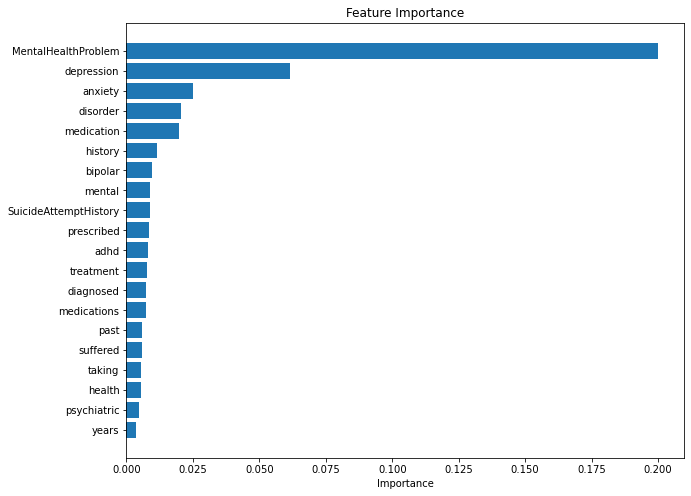

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_names = tfidf.get_feature_names_out()  # Get names of TF-IDF features
combined_feature_names = list(feature_names) + list(X_features.columns)  # Combine TF-IDF and other features

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': combined_feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20])  # Top 20 features
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Reverse the order
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.98375


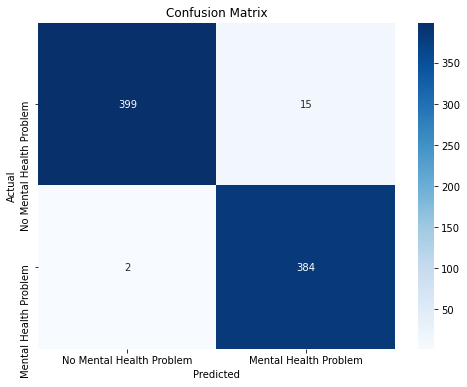

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Mental Health Problem', 'Mental Health Problem'],
            yticklabels=['No Mental Health Problem', 'Mental Health Problem'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'grid_search' is not defined